# *Assignment for Business Analyst Intern*

### *Importing the Liibrary*

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
order_details = pd.read_csv("BA6FA2C0.csv")
orders = pd.read_csv("515D3EAE.csv")
sales_target = pd.read_csv("3B2F4408.csv")

## *Explore the Dataset*

### *Quick Preview of Data*

In [15]:
order_details.head(3), orders.head(3), sales_target.head(3)

(  Order ID  Amount  Profit  Quantity   Category Sub-Category
 0  B-25601  1275.0 -1148.0         7  Furniture    Bookcases
 1  B-25601    66.0   -12.0         5   Clothing        Stole
 2  B-25601     8.0    -2.0         3   Clothing  Hankerchief,
   Order ID  Order Date CustomerName           State       City
 0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
 1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
 2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal,
   Month of Order Date   Category   Target
 0              Apr-18  Furniture  10400.0
 1              May-18  Furniture  10500.0
 2              Jun-18  Furniture  10600.0)

### *Data information*

In [16]:
order_details.info(), orders.info(), sales_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex

(None, None, None)

### *Summary Statistics*

In [17]:
order_details.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.000000,1500.000000
mean,287.668000,15.970000,3.743333
std,461.050488,169.140565,2.184942
min,4.000000,-1981.000000,1.000000
25%,45.000000,-9.250000,2.000000
50%,118.000000,9.000000,3.000000
75%,322.000000,38.000000,5.000000
max,5729.000000,1698.000000,14.000000


In [18]:
sales_target.describe()

,Target
count,36.000000
mean,12108.333333
std,2667.837541
min,9000.000000
25%,10050.000000
50%,11450.000000
75%,14500.000000
max,16000.000000


### *Merge Datasets on 'Order ID'*

In [19]:
merged_df = pd.merge(order_details, orders, on='Order ID')

In [20]:
merged_df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune
...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones,30-03-2019,Bhishm,Maharashtra,Mumbai
1496,B-26099,2366.0,552.0,5,Clothing,Trousers,30-03-2019,Bhishm,Maharashtra,Mumbai
1497,B-26100,828.0,230.0,2,Furniture,Chairs,31-03-2019,Hitika,Madhya Pradesh,Indore
1498,B-26100,34.0,10.0,2,Clothing,T-shirt,31-03-2019,Hitika,Madhya Pradesh,Indore


### *Category-Level Sales and Profit Analysis*

In [21]:
category_sales = merged_df.groupby('Category')['Amount'].sum()

In [22]:
category_sales

,Amount
Category,
Clothing,139054.0
Electronics,165267.0
Furniture,127181.0


In [23]:
order_details.columns, orders.columns, sales_target.columns

(Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category'], dtype='object'),
 Index(['Order ID', 'Order Date', 'CustomerName', 'State', 'City'], dtype='object'),
 Index(['Month of Order Date', 'Category', 'Target'], dtype='object'))

### *Average profit per order for each category*

In [24]:
category_avg_profit = merged_df.groupby('Category')['Profit'].mean()

In [25]:
category_avg_profit

,Profit
Category,
Clothing,11.762908
Electronics,34.071429
Furniture,9.456790


In [26]:
category_total_profit = merged_df.groupby('Category')['Profit'].sum()

In [27]:
category_total_profit

,Profit
Category,
Clothing,11163.0
Electronics,10494.0
Furniture,2298.0


### *Profit margin (profit as a percentage of Amount) for each category*

In [36]:
category_profit_margin = (category_total_profit / category_sales) * 100

In [37]:
category_profit_margin

,0
Category,
Clothing,8.027817
Electronics,6.349725
Furniture,1.806874


## *Final Category Summary Table*

In [38]:
category_summary = merged_df.groupby('Category').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).reset_index()

category_summary['Avg Profit per Order'] = category_summary['Profit'] / category_summary['Order ID']
category_summary['Profit Margin (%)'] = (category_summary['Profit'] / category_summary['Amount']) * 100

In [40]:
category_summary

,Category,Amount,Profit,Order ID,Avg Profit per Order,Profit Margin (%)
0,Clothing,139054.0,11163.0,393,28.404580,8.027817
1,Electronics,165267.0,10494.0,204,51.441176,6.349725
2,Furniture,127181.0,2298.0,186,12.354839,1.806874


### *Month-over-Month Target Analysis (Furniture Only)*

In [44]:
sales_target.columns = sales_target.columns.str.strip()

furniture = sales_target[sales_target['Category'] == 'Furniture'].copy()
furniture['Month of Order Date'] = pd.to_datetime(furniture['Month of Order Date'], format='%b-%y')
furniture.sort_values('Month of Order Date', inplace=True)
furniture['Target Change (%)'] = furniture['Target'].pct_change() * 100

In [45]:
furniture[['Month of Order Date', 'Target', 'Target Change (%)']]

,Month of Order Date,Target,Target Change (%)
0,2018-04-01,10400.0,NaN
1,2018-05-01,10500.0,0.961538
2,2018-06-01,10600.0,0.952381
3,2018-07-01,10800.0,1.886792
4,2018-08-01,10900.0,0.925926
5,2018-09-01,11000.0,0.917431
6,2018-10-01,11100.0,0.909091
7,2018-11-01,11300.0,1.801802
8,2018-12-01,11400.0,0.884956
9,2019-01-01,11500.0,0.877193


## *Top 5 States by Order Volume*

In [47]:
top_states = merged_df['State'].value_counts().head(5).index.tolist()

In [48]:
regional_df = merged_df[merged_df['State'].isin(top_states)]

In [50]:
regional_df.head(3)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad


In [52]:
regional_df.tail(3)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
1497,B-26100,828.0,230.0,2,Furniture,Chairs,31-03-2019,Hitika,Madhya Pradesh,Indore
1498,B-26100,34.0,10.0,2,Clothing,T-shirt,31-03-2019,Hitika,Madhya Pradesh,Indore
1499,B-26100,72.0,16.0,2,Clothing,Shirt,31-03-2019,Hitika,Madhya Pradesh,Indore


In [53]:
regional_df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'Order Date', 'CustomerName', 'State', 'City'],
      dtype='object')

### *Regional Sales Summary*

In [54]:
state_summary = regional_df.groupby('State').agg({
    'Amount': 'sum',
    'Profit': ['sum', 'mean']
}).reset_index()

state_summary.columns = ['State', 'Total Sales', 'Total Profit', 'Average Profit']

In [55]:
state_summary

,State,Total Sales,Total Profit,Average Profit
0,Delhi,22531.0,2987.0,40.364865
1,Gujarat,21058.0,465.0,5.344828
2,Madhya Pradesh,105140.0,5551.0,16.326471
3,Maharashtra,95348.0,6176.0,21.296552
4,Rajasthan,21149.0,1257.0,16.986486


### *(Optional) Bar Chart: Total Sales vs Total Profit by Category*

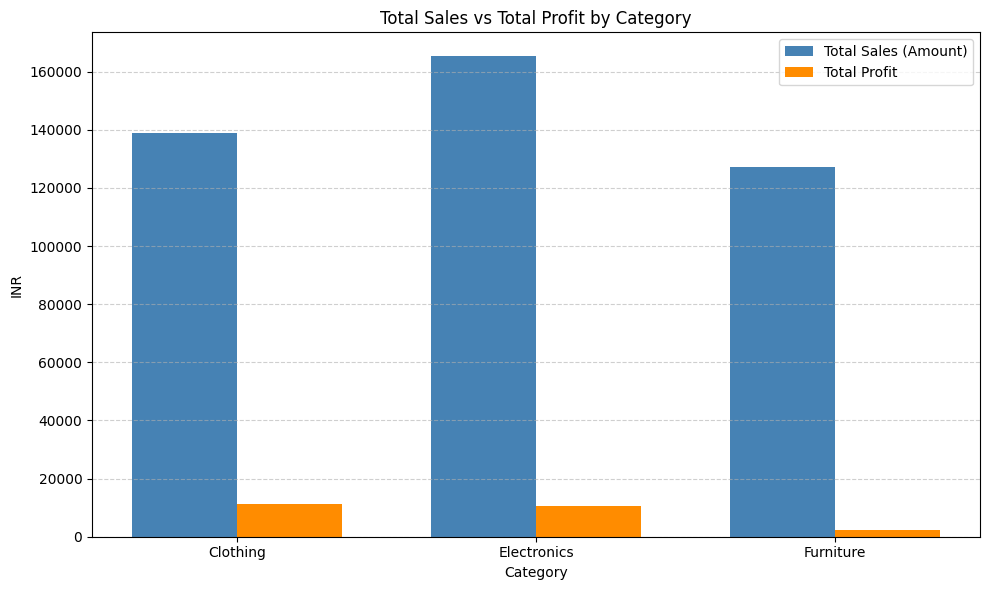

In [56]:
# Make sure category_data exists or use category_summary
category_data = category_summary

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(category_data))

plt.bar(index, category_data['Amount'], width=bar_width, label='Total Sales (Amount)', color='steelblue')
plt.bar([i + bar_width for i in index], category_data['Profit'], width=bar_width, label='Total Profit', color='darkorange')

plt.xlabel('Category')
plt.ylabel('INR')
plt.title('Total Sales vs Total Profit by Category')
plt.xticks([i + bar_width / 2 for i in index], category_data['Category'])
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()